# Exploring the UNSW-NB15 Dataset

**Official dataset link:** [UNSW-NB15](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

In this Jupyter Notebook, we will explore the datetime features of the UNSW-NB15 dataset.

Let's dive into our analysis of the datetime features in the UNSW-NB15 dataset!


In [33]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definiamo il percorso dei dati
DATA_PATH = "/users/mik2002/UNSW-NB15-dataset/CSV_Files/Training and Testing Sets"

# Carichiamo i file CSV
df_training = pd.read_csv(DATA_PATH+"/UNSW_NB15_training-set.csv")
df_testing = pd.read_csv(DATA_PATH+"/UNSW_NB15_testing-set.csv")

# Concatenazione dei due dataset
df = pd.concat([df_training, df_testing], ignore_index=True)

# Esplorazione del dataset
# Visualizziamo le prime righe del dataset
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [34]:
# Informazioni di base sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


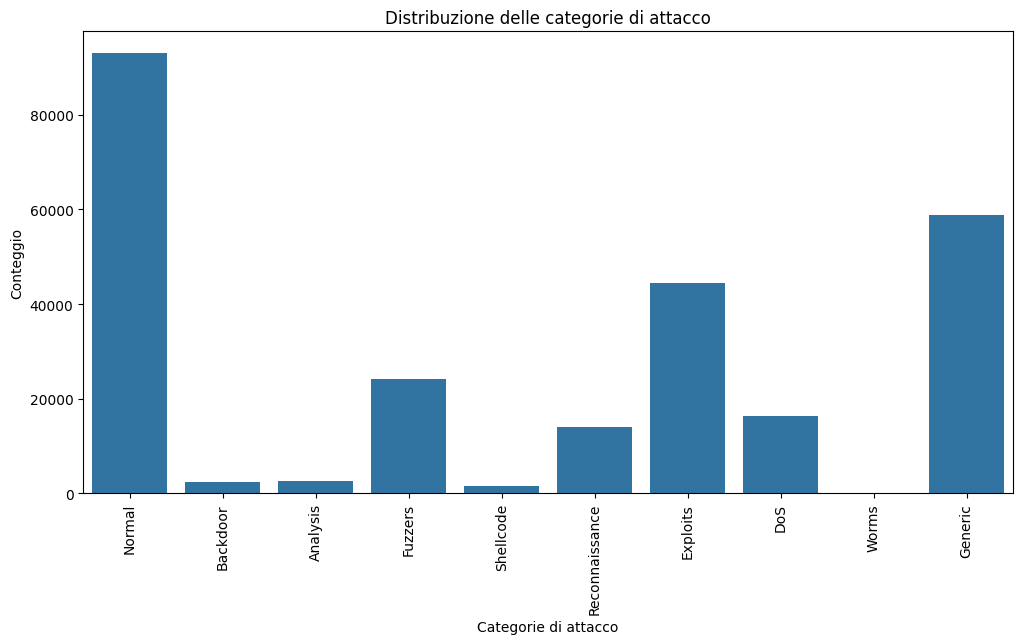

In [35]:
# Distribuzione delle varie categorie di attacco
attack_types = df['attack_cat'].value_counts()
print(attack_types)

# Visualizzazione della distribuzione delle categorie di attacco
plt.figure(figsize=(12, 6))
sns.countplot(x='attack_cat', data=df)
plt.title('Distribuzione delle categorie di attacco')
plt.xlabel('Categorie di attacco')
plt.ylabel('Conteggio')
plt.xticks(rotation=90)
plt.show()


In [36]:
# Verifica delle categorie di attacco presenti
attack_labels = df['attack_cat'].unique()
print("Categorie di attacco presenti nel dataset:", attack_labels)

Categorie di attacco presenti nel dataset: ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']


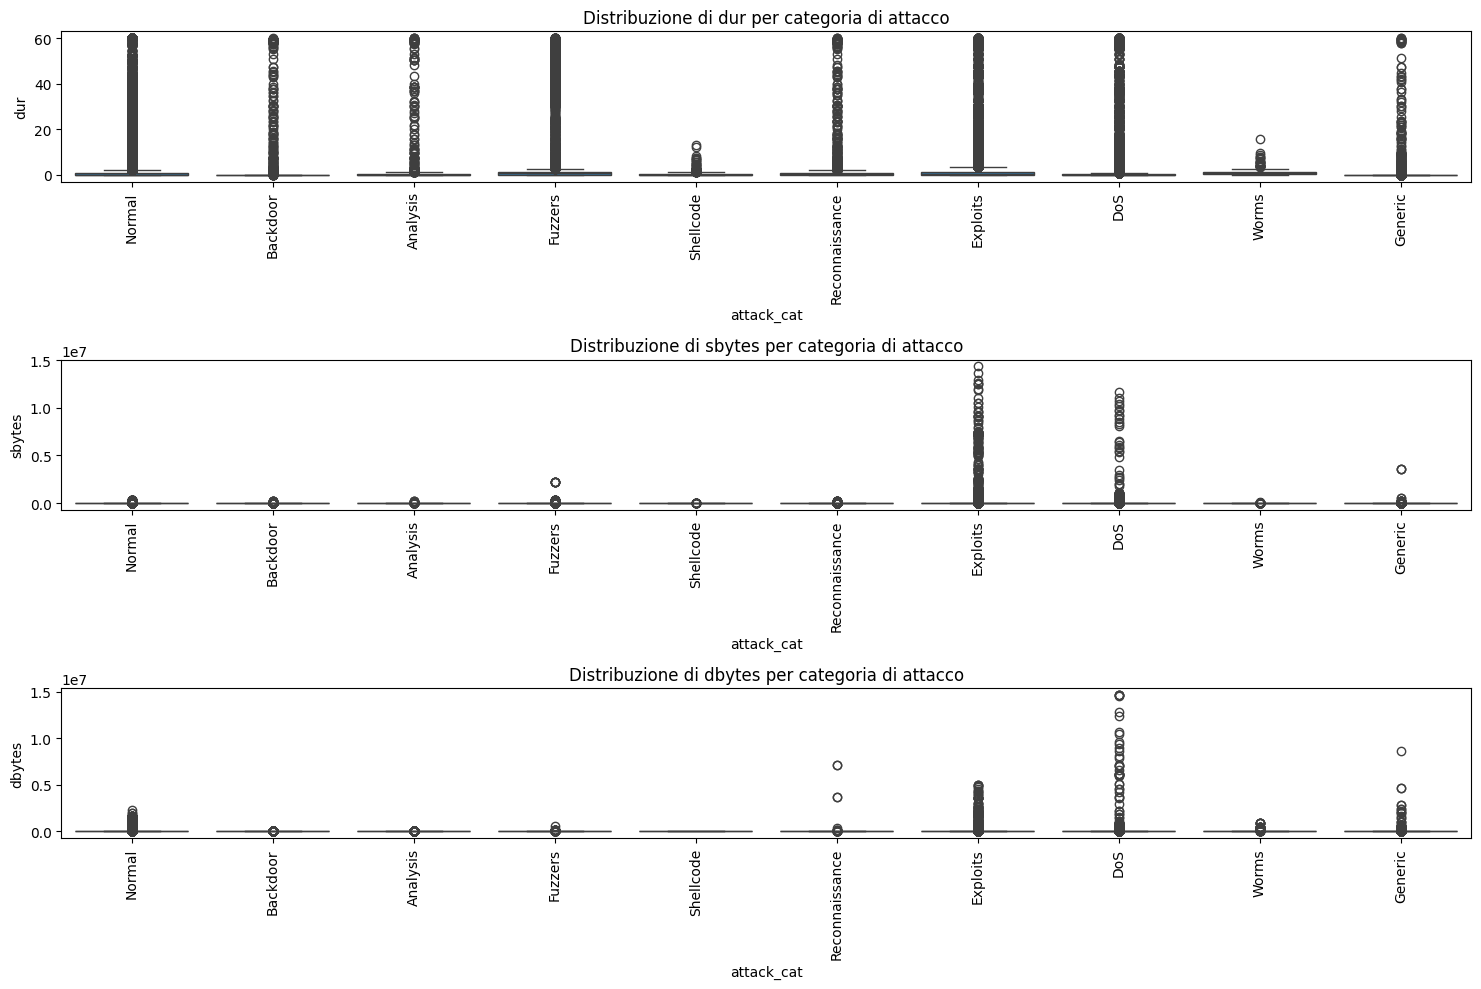

In [37]:
# Visualizzazione della distribuzione di alcune caratteristiche chiave per ciascuna categoria di attacco
features_to_plot = ['dur', 'sbytes', 'dbytes']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)
    sns.boxplot(x='attack_cat', y=feature, data=df)
    plt.title(f'Distribuzione di {feature} per categoria di attacco')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


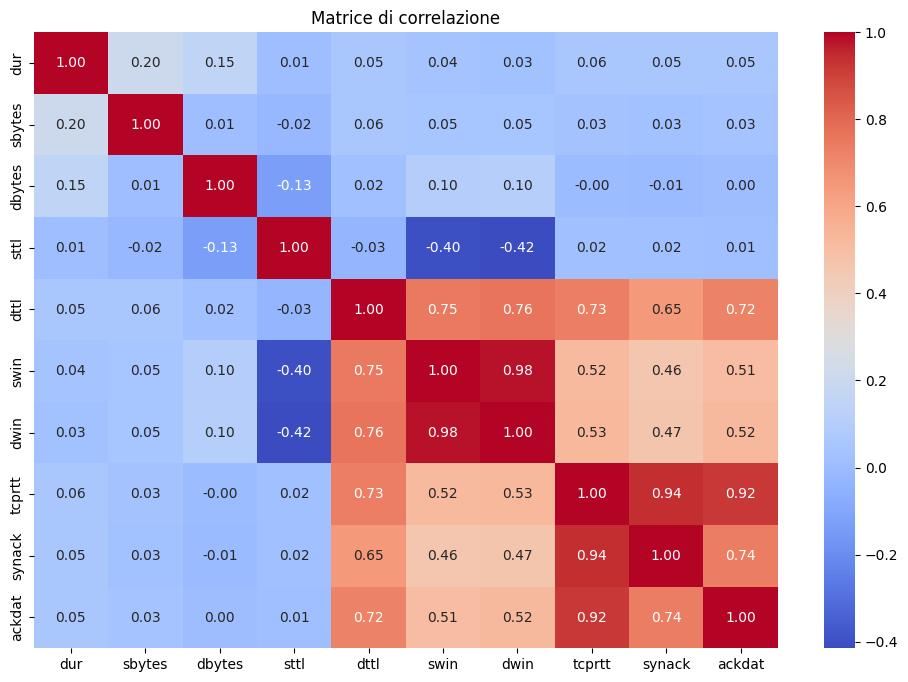

In [38]:
# Matrice di correlazione per alcune caratteristiche chiave suddivise per categoria di attacco
corr_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione')
plt.show()
